# LIVER TISSUE SAMPLE FROM DONOR 1

In [1]:
import pandas as pd
import numpy as np
import math
import re

## Load the file generated by salmon quant (converted to .xlsx)

In [2]:
donor = pd.read_excel("Donor1TPM.xlsx") 
donor

,Name,Length,EffectiveLength,TPM,NumReads
0,ENST00000456328.2|ENSG00000223972.5|OTTHUMG000...,1657,1407.000,0.000000,0.000
1,ENST00000450305.2|ENSG00000223972.5|OTTHUMG000...,632,382.000,0.000000,0.000
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG000...,1351,1101.000,0.000000,0.000
3,ENST00000619216.1|ENSG00000278267.1|-|-|MIR685...,68,2.848,0.000000,0.000
4,ENST00000473358.1|ENSG00000243485.5|OTTHUMG000...,712,462.000,0.000000,0.000
...,...,...,...,...,...
227457,ENST00000361681.2|ENSG00000198695.2|-|-|MT-ND6...,525,275.000,1061.885159,759.649
227458,ENST00000387459.1|ENSG00000210194.1|-|-|MT-TE-...,69,2.865,2280.631036,17.000
227459,ENST00000361789.2|ENSG00000198727.2|-|-|MT-CYB...,1141,891.000,8530.748497,19772.768
227460,ENST00000387460.2|ENSG00000210195.2|-|-|MT-TT-...,66,2.815,2185.104542,16.000


Modify the 'Name' column and remove the exessive columns

In [3]:
donor[['ENST','ENSG', 'OTTHUMG', 'OTTHUMT', 'GeneTranscriptID', 'GeneID', 'Length_1','Type', 'ToRemove']] = donor.Name.str.split("|",expand = True,)
donor = donor.drop(['Name','ENST','ENSG','OTTHUMG','OTTHUMT','Length_1','ToRemove'],axis = 1)
donor = donor[['GeneTranscriptID','GeneID','Length','Type','EffectiveLength','TPM', 'NumReads']]
donor

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.000000,0.000
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.000000,0.000
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.000000,0.000
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.000000,0.000
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.000000,0.000
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1061.885159,759.649
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,2280.631036,17.000
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,8530.748497,19772.768
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,2185.104542,16.000


### Drop the zero transscripts

In [4]:
donor.loc[donor['TPM'] != 0] # Non-zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
20,CICP27-201,CICP27,3812,processed_pseudogene,3562.000,0.107920,1.000
36,AP006222.1-202,AP006222.1,2250,lncRNA,2000.000,0.314524,1.636
40,AP006222.1-206,AP006222.1,5603,lncRNA,5353.000,0.071813,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,4720.994988,1498.291
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,1884.892374,3893.227
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1061.885159,759.649
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,2280.631036,17.000
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,8530.748497,19772.768
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,2185.104542,16.000


In [5]:
donor.loc[donor['TPM'] == 0]# Zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.0,0.0
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.0,0.0
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.0,0.0
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.0,0.0
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.0,0.0
...,...,...,...,...,...,...,...
227433,MT-TM-201,MT-TM,68,Mt_tRNA,2.848,0.0,0.0
227448,MT-TG-201,MT-TG,68,Mt_tRNA,2.848,0.0,0.0
227450,MT-TR-201,MT-TR,65,Mt_tRNA,2.798,0.0,0.0
227453,MT-TH-201,MT-TH,69,Mt_tRNA,2.865,0.0,0.0


In [6]:
donor.describe() # Общая информация

,Length,EffectiveLength,TPM,NumReads
count,227462.000000,227462.000000,227462.000000,227462.000000
mean,1572.205001,1328.013905,4.396339,6.095128
std,1880.949598,1876.647383,282.176351,220.117746
min,8.000000,1.722000,0.000000,0.000000
25%,564.000000,314.000000,0.000000,0.000000
50%,881.000000,631.000000,0.000000,0.000000
75%,1990.000000,1740.000000,0.000000,0.000000
max,205012.000000,204762.000000,83283.669897,38260.567000


In [7]:
donor.loc[donor['TPM'] != 0].describe() # Только для ненулевых транскриптов

,Length,EffectiveLength,TPM,NumReads
count,30104.000000,30104.000000,30104.000000,30104.000000
mean,2779.447814,2529.920750,33.218177,46.054010
std,2767.018167,2766.576249,775.038644,603.544561
min,59.000000,2.702000,0.004751,0.358000
25%,1081.750000,831.750000,0.381487,1.951000
50%,2099.000000,1849.000000,1.093278,4.782500
75%,3667.250000,3417.250000,3.714094,13.658500
max,205012.000000,204762.000000,83283.669897,38260.567000


### Save the non-zero transcripts for futher work

In [8]:
donor = donor[donor.TPM != 0]
donor

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
20,CICP27-201,CICP27,3812,processed_pseudogene,3562.000,0.107920,1.000
36,AP006222.1-202,AP006222.1,2250,lncRNA,2000.000,0.314524,1.636
40,AP006222.1-206,AP006222.1,5603,lncRNA,5353.000,0.071813,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,4720.994988,1498.291
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,1884.892374,3893.227
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1061.885159,759.649
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,2280.631036,17.000
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,8530.748497,19772.768
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,2185.104542,16.000


### Sort the transcripts by TPM to get the top-expressed transcripts

In [9]:
donor.sort_values(by = ['TPM'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227449,MT-ND3-201,MT-ND3,346,protein_coding,96.006,83283.669897,20799.838
98,MTATP8P1-201,MTATP8P1,207,unprocessed_pseudogene,9.766,77279.323654,1963.278
202058,APOC1-201,APOC1,425,protein_coding,175.000,33751.793645,15365.176
128301,APOC3-205,APOC3,541,protein_coding,291.000,27253.299706,20630.735
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.000,21049.752272,29240.909
...,...,...,...,...,...,...,...
4799,MACF1-232,MACF1,24319,protein_coding,24069.000,0.017656,1.106
138573,MGAT4C-209,MGAT4C,25116,protein_coding,24866.000,0.015654,1.013
153203,RPS6KA5-207,RPS6KA5,26829,protein_coding,26579.000,0.014541,1.005
7249,NFIA-215,NFIA,44880,retained_intron,44630.000,0.008613,1.000


### Sort the transcripts by number of reads mapped

In [10]:
donor.sort_values(by = ['NumReads'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227428,MT-RNR2-201,MT-RNR2,1559,Mt_rRNA,1309.000,11235.932611,38260.567
54328,ALB-219,ALB,1418,protein_coding,1168.000,10329.994476,31386.693
54337,ALB-216,ALB,1519,protein_coding,1269.000,9012.421733,29751.287
54333,ALB-209,ALB,1741,protein_coding,1491.000,7605.194729,29497.867
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.000,21049.752272,29240.909
...,...,...,...,...,...,...,...
221747,CCNB3-202,CCNB3,1201,protein_coding,951.000,0.202110,0.500
221744,CCNB3-203,CCNB3,1201,protein_coding,951.000,0.202110,0.500
26766,AC159540.2-201,AC159540.2,754,lncRNA,504.000,0.381361,0.500
226476,KRT18P53-201,KRT18P53,117,processed_pseudogene,3.947,34.841616,0.358


### Thequantitative profile of transcripts biotypes

In [11]:
donor['Type'].unique()

array(['processed_pseudogene', 'lncRNA', 'unprocessed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'protein_coding',
       'retained_intron', 'nonsense_mediated_decay',
       'polymorphic_pseudogene', 'TEC', 'misc_RNA', 'snRNA', 'scRNA',
       'miRNA', 'IG_V_gene', 'IG_C_gene', 'IG_V_pseudogene',
       'transcribed_processed_pseudogene', 'scaRNA', 'snoRNA',
       'TR_C_gene', 'TR_V_gene', 'non_stop_decay',
       'transcribed_unitary_pseudogene', 'unitary_pseudogene',
       'rRNA_pseudogene', 'rRNA', 'pseudogene', 'Mt_rRNA', 'Mt_tRNA'],
      dtype=object)

In [12]:
for i in donor['Type'].unique():
    print(i,':', len(donor[donor['Type'].str.contains(i)]))

processed_pseudogene : 396
lncRNA : 4646
unprocessed_pseudogene : 81
transcribed_unprocessed_pseudogene : 36
protein_coding : 19675
retained_intron : 2960
nonsense_mediated_decay : 2181
polymorphic_pseudogene : 6
TEC : 97
misc_RNA : 7
snRNA : 8
scRNA : 1
miRNA : 7
IG_V_gene : 35
IG_C_gene : 20
IG_V_pseudogene : 5
transcribed_processed_pseudogene : 18
scaRNA : 1
snoRNA : 8
TR_C_gene : 6
TR_V_gene : 2
non_stop_decay : 13
transcribed_unitary_pseudogene : 2
unitary_pseudogene : 4
rRNA_pseudogene : 3
rRNA : 9
pseudogene : 415
Mt_rRNA : 2
Mt_tRNA : 16


In [13]:
# RNA
len(donor[donor['Type'].str.contains(r'RNA')])

4703

In [14]:
# Pseudogenes
len(donor[donor['Type'].str.contains(r'pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_unprocessed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_processed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'processed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'unprocessed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'polymorphic_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_unitary_pseudogene')])

954

In [15]:
#IFGTR
len(donor[donor['Type'].str.contains(r'IG_V_gene')]) + \
len(donor[donor['Type'].str.contains(r'IG_C_gene')]) + \
len(donor[donor['Type'].str.contains(r'IG_V_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'TR_C_gene')]) + \
len(donor[donor['Type'].str.contains(r'TR_V_gene')])

68

## Visualization

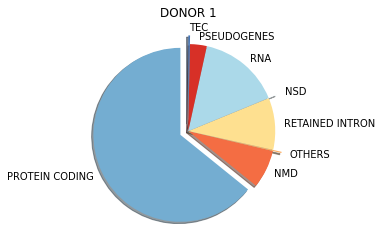

In [16]:
import matplotlib.pyplot as plt

labels = ['PROTEIN CODING', 
          'NMD',
          'OTHERS',
          'RETAINED INTRON',
          'NSD',
          'RNA', 
          'PSEUDOGENES', 
          'TEC']

sizes = [19675, 2181, 68, 2960, 13, 4703, 954, 97]

colors =['#74add1', '#f46d43', '#fdae61', '#fee090', '#e0f3f8', '#abd9e9','#d73027' , '#4575b4']

explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, colors = colors,
        shadow = True, startangle = 90)

ax1.set_title("DONOR 1")

#plt.savefig('Donor1_Sum.png')

plt.show()

### Retrieve protein_coding transcripts 

In [17]:
donor_protein = donor[donor['Type'].str.contains(r'protein_coding')]
donor_protein
# protein_coding = 19675

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
202,NOC2L-201,NOC2L,2757,protein_coding,2507.000,0.642491,4.190
208,KLHL17-201,KLHL17,2567,protein_coding,2317.000,0.165910,1.000
209,KLHL17-205,KLHL17,1950,protein_coding,1700.000,0.226125,1.000
222,HES4-202,HES4,1040,protein_coding,790.000,0.486598,1.000
225,HES4-204,HES4,667,protein_coding,417.000,0.921852,1.000
...,...,...,...,...,...,...,...
227451,MT-ND4L-201,MT-ND4L,297,protein_coding,48.689,6087.962608,771.093
227452,MT-ND4-201,MT-ND4,1378,protein_coding,1128.000,8799.009225,25819.361
227456,MT-ND5-201,MT-ND5,1812,protein_coding,1562.000,710.549985,2887.209
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,1061.885159,759.649


In [18]:
donor_protein[(donor_protein['GeneID'] == 'A1CF')] # суммирование работает

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
111937,A1CF-201,A1CF,9350,protein_coding,9100.0,5.861531,138.757
111938,A1CF-207,A1CF,9400,protein_coding,9150.0,6.354089,151.244


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [19]:
spl_var_num = donor_protein.groupby('GeneID', as_index = False).count() 
spl_var_num

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,A1BG,1,1,1,1,1,1
1,A1CF,2,2,2,2,2,2
2,A2M,1,1,1,1,1,1
3,AAAS,2,2,2,2,2,2
4,AACS,1,1,1,1,1,1
...,...,...,...,...,...,...,...
11660,ZXDB,1,1,1,1,1,1
11661,ZXDC,1,1,1,1,1,1
11662,ZYG11B,2,2,2,2,2,2
11663,ZYX,2,2,2,2,2,2


## Summing the total TPM for each gene

In [20]:
total_tpm = donor_protein.groupby('GeneID', as_index = False).sum()
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumReads
0,A1BG,3382,3132.0,28.274836,230.369
1,A1CF,18750,18250.0,12.215620,290.001
2,A2M,4844,4594.0,55.538724,663.727
3,AAAS,3995,3495.0,2.816712,11.001
4,AACS,3256,3006.0,0.127882,1.000
...,...,...,...,...,...
11660,ZXDB,5894,5644.0,0.681099,10.000
11661,ZXDC,2579,2329.0,0.165055,1.000
11662,ZYG11B,10437,9937.0,1.308237,24.000
11663,ZYX,4173,3673.0,9.569558,45.615


In [21]:
total_tpm.insert(4, "NumSplVar", spl_var_num['Length'], True)

In [22]:
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,A1BG,3382,3132.0,28.274836,1,230.369
1,A1CF,18750,18250.0,12.215620,2,290.001
2,A2M,4844,4594.0,55.538724,1,663.727
3,AAAS,3995,3495.0,2.816712,2,11.001
4,AACS,3256,3006.0,0.127882,1,1.000
...,...,...,...,...,...,...
11660,ZXDB,5894,5644.0,0.681099,1,10.000
11661,ZXDC,2579,2329.0,0.165055,1,1.000
11662,ZYG11B,10437,9937.0,1.308237,2,24.000
11663,ZYX,4173,3673.0,9.569558,2,45.615


## There is 11665 protein coding genes in liver tissue of donor 1 (19675 transcripts)

In [23]:
for i in total_tpm['NumSplVar'].unique():
    print('Number of genes having',i,'isoforms (splice variants) is :', len(total_tpm[(total_tpm['NumSplVar'] == i)]))

Number of genes having 1 isoforms (splice variants) is : 6194
Number of genes having 2 isoforms (splice variants) is : 3723
Number of genes having 4 isoforms (splice variants) is : 338
Number of genes having 3 isoforms (splice variants) is : 1238
Number of genes having 5 isoforms (splice variants) is : 108
Number of genes having 6 isoforms (splice variants) is : 35
Number of genes having 7 isoforms (splice variants) is : 19
Number of genes having 8 isoforms (splice variants) is : 6
Number of genes having 10 isoforms (splice variants) is : 2
Number of genes having 9 isoforms (splice variants) is : 2


Text(0.5, 0.98, 'DONOR 1')

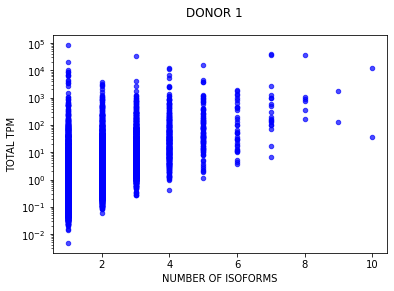

In [24]:
total_tpm.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'blue')
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('DONOR 1')
# plt.savefig('Donor1_SplVar.png')

# Cytochrome P450

In [25]:
donor_cyp = donor_protein[donor_protein['GeneID'].str.contains(r'CYP')]
donor_cyp

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
6220,CYP4A11-202,CYP4A11,1760,protein_coding,1510.0,0.297367,1.168
6221,CYP4A11-201,CYP4A11,2530,protein_coding,2280.0,93.774351,556.188
6222,CYP4A11-204,CYP4A11,1775,protein_coding,1525.0,0.269650,1.070
6226,CYP4A11-203,CYP4A11,1725,protein_coding,1475.0,2.365253,9.076
6232,CYP4X1-201,CYP4X1,2256,protein_coding,2006.0,1.149788,6.000
...,...,...,...,...,...,...,...
201146,CYP2B6-202,CYP2B6,1426,protein_coding,1176.0,0.592661,1.813
218542,CYP2D6-205,CYP2D6,1588,protein_coding,1338.0,2.335364,8.129
218543,CYP2D6-203,CYP2D6,1714,protein_coding,1464.0,30.716665,116.982
218545,CYP2D6-201,CYP2D6,1433,protein_coding,1183.0,12.452201,38.321


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [26]:
cyp_spl = donor_cyp.groupby('GeneID', as_index=False).count() #Информация о каждой группе (сколько сплайс-вариантов у каждого гена цитохромов)
cyp_spl

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,ACYP1,1,1,1,1,1,1
1,ACYP2,4,4,4,4,4,4
2,CYP11A1,1,1,1,1,1,1
3,CYP17A1,1,1,1,1,1,1
4,CYP1A1,1,1,1,1,1,1
5,CYP1A2,1,1,1,1,1,1
6,CYP1B1,1,1,1,1,1,1
7,CYP20A1,1,1,1,1,1,1
8,CYP21A2,1,1,1,1,1,1
9,CYP26A1,2,2,2,2,2,2


In [27]:
total_tpm_cyp = donor_cyp.groupby('GeneID', as_index=False).sum() # summing TPM on all splice varinats of a single gene
total_tpm_cyp   

,GeneID,Length,EffectiveLength,TPM,NumReads
0,ACYP1,565,315.0,3.661070,3.000
1,ACYP2,4957,3957.0,12.854982,26.852
2,CYP11A1,2001,1751.0,0.439078,2.000
3,CYP17A1,1227,977.0,0.393462,1.000
4,CYP1A1,2521,2271.0,1.184891,7.000
5,CYP1A2,3132,2882.0,31.211832,234.000
6,CYP1B1,5218,4968.0,0.386888,5.000
7,CYP20A1,1986,1736.0,1.033129,4.666
8,CYP21A2,1914,1664.0,0.385102,1.667
9,CYP26A1,4362,3862.0,1.126447,5.749


In [28]:
total_tpm_cyp.insert(4, "NumSplVar", cyp_spl['Length'], True)

In [29]:
total_tpm_cyp

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,ACYP1,565,315.0,3.661070,1,3.000
1,ACYP2,4957,3957.0,12.854982,4,26.852
2,CYP11A1,2001,1751.0,0.439078,1,2.000
3,CYP17A1,1227,977.0,0.393462,1,1.000
4,CYP1A1,2521,2271.0,1.184891,1,7.000
5,CYP1A2,3132,2882.0,31.211832,1,234.000
6,CYP1B1,5218,4968.0,0.386888,1,5.000
7,CYP20A1,1986,1736.0,1.033129,1,4.666
8,CYP21A2,1914,1664.0,0.385102,1,1.667
9,CYP26A1,4362,3862.0,1.126447,2,5.749


In [30]:
total_tpm_cyp = total_tpm_cyp.iloc[2:] # Drop non-CYP

In [31]:
total_tpm_cyp

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
2,CYP11A1,2001,1751.0,0.439078,1,2.000
3,CYP17A1,1227,977.0,0.393462,1,1.000
4,CYP1A1,2521,2271.0,1.184891,1,7.000
5,CYP1A2,3132,2882.0,31.211832,1,234.000
6,CYP1B1,5218,4968.0,0.386888,1,5.000
7,CYP20A1,1986,1736.0,1.033129,1,4.666
8,CYP21A2,1914,1664.0,0.385102,1,1.667
9,CYP26A1,4362,3862.0,1.126447,2,5.749
10,CYP27A1,1895,1645.0,19.835692,1,84.882
11,CYP27B1,2372,2122.0,0.181156,1,1.000


## There is 41 CYP gene in donor 1

Text(0.5, 0.98, 'DONOR 1')

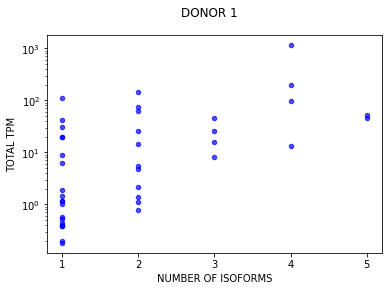

In [32]:
total_tpm_cyp.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'blue')
plt.xticks([1,2,3,4,5])
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('DONOR 1')
# plt.savefig('Donor1_SplVarСyp.png')

In [33]:
len(total_tpm_cyp[total_tpm_cyp.NumSplVar == 1])

20

In [34]:
total_tpm_cyp.describe()

,Length,EffectiveLength,TPM,NumSplVar,NumReads
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,4613.195122,4125.390244,54.367325,1.951220,257.155463
std,2791.392307,2555.680182,180.096385,1.203146,728.126925
min,990.000000,740.000000,0.181156,1.000000,1.000000
25%,2256.000000,2006.000000,1.126447,1.000000,6.000000
50%,3992.000000,3492.000000,7.998993,2.000000,78.018000
75%,5548.000000,4968.000000,41.258921,2.000000,214.253000
max,11477.000000,10477.000000,1147.407630,5.000000,4592.680000


In [35]:
#total_tpm_cyp.to_excel("sum_cyp_donor.xlsx") 

# Pharmacogenes

In [36]:
pharmgenes = pd.read_excel("Pharmacogenes.xlsx") # The list of pharmacogenes from Chhibber et al., 2017
pharmgenes = pharmgenes.set_index('Gene')

In [37]:
pharmgenes

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCA4,2,ENSG00000198691.6,ABC_Transporter,Y,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
VDR,385,ENSG00000111424.6,Nuclear Receptor/Transcription Factor,Y,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N
XDH,387,ENSG00000158125.5,Other_Metabolism,Y,N,Y,N


In [38]:
## Set the GeneID as index column

In [39]:
prot_idx = total_tpm.set_index('GeneID')
prot_idx

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
A1BG,3382,3132.0,28.274836,1,230.369
A1CF,18750,18250.0,12.215620,2,290.001
A2M,4844,4594.0,55.538724,1,663.727
AAAS,3995,3495.0,2.816712,2,11.001
AACS,3256,3006.0,0.127882,1,1.000
...,...,...,...,...,...
ZXDB,5894,5644.0,0.681099,1,10.000
ZXDC,2579,2329.0,0.165055,1,1.000
ZYG11B,10437,9937.0,1.308237,2,24.000


## Search for pharmacogenes in the donor 1 

In [40]:
pharmgenes_donor = prot_idx[prot_idx.index.isin(pharmgenes.index)]
pharmgenes_donor

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
ABCA1,10408,10158.0,1.324516,1,35.000
ABCB1,9423,8923.0,0.644505,2,7.459
ABCB10,3869,3619.0,1.911971,1,18.000
ABCB11,10328,9578.0,18.809657,3,42.000
ABCB4,16278,15028.0,14.105894,5,92.797
...,...,...,...,...,...
UGT2B7,5919,4919.0,408.801121,4,1503.119
VKORC1,3539,2539.0,166.993086,4,289.729
XDH,5715,5465.0,6.330671,1,90.000


## There is 268 pharmacogenes found in donor 1

In [41]:
#pharmgenes_donor.to_excel("Pharmacogenes_d1.xlsx") 

## Sort by TPM to get the top-expressed pharmacogenes

In [42]:
pharmgenes_donor.sort_values(by = ['TPM'], ascending = False).head(50)

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
ALB,13622,11622.000,37509.085517,8,130740.155
APOA2,2974,1236.222,35955.213387,7,17994.825
APOA1,5114,3864.000,16038.633868,5,28746.842
ORM1,802,552.000,6707.479066,1,9631.657
APOE,2767,2017.000,3980.112725,3,9384.240
ORM2,764,514.000,3529.958742,1,4719.928
SERPINA1,21322,19072.000,1714.177982,9,6514.363
CYP2E1,5572,4572.000,1147.407630,4,4592.680
CES1,6528,5528.000,862.238181,4,2282.389


In [43]:
phgt = pharmgenes[pharmgenes.index.isin(pharmgenes_donor.index)]
phgt

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
ABCB4,6,ENSG00000005471.11,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
UGT2B7,383,ENSG00000171234.9,UGT_Metabolism,N,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N
XDH,387,ENSG00000158125.5,Other_Metabolism,Y,N,Y,N


In [44]:
len(phgt['Category'].unique())

14

In [45]:
print('ABC_Transporter:', len(phgt[phgt['Category'].str.contains(r'ABC_Transporter')]))
print('Other:', len(phgt[phgt['Category'].str.contains(r'Other')]))
print('ADH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ADH_Metabolism')]))
print('Receptor:', len(phgt[phgt['Category'].str.contains(r'Receptor')]))
print('Nuclear Receptor/Transcription Factor:', len(phgt[phgt['Category'].str.contains(r'Nuclear Receptor/Transcription Factor')]))
print('ALDH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ALDH_Metabolism')]))
print('Other_Metabolism:', len(phgt[phgt['Category'].str.contains(r'Other_Metabolism')]))
print('Other_Transporter:', len(phgt[phgt['Category'].str.contains(r'Other_Transporter')]))
print('CYP_Metabolism:', len(phgt[phgt['Category'].str.contains(r'CYP_Metabolism')]))
print('GST_Metabolism:', len(phgt[phgt['Category'].str.contains(r'GST_Metabolism')]))
print('Channel:', len(phgt[phgt['Category'].str.contains(r'Channel')]))
print('SLC_Transporter:', len(phgt[phgt['Category'].str.contains(r'SLC_Transporter')]))
print('SULT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'SULT_Metabolism')]))
print('UGT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'UGT_Metabolism')]))

ABC_Transporter: 16
Other: 101
ADH_Metabolism: 7
Receptor: 34
Nuclear Receptor/Transcription Factor: 23
ALDH_Metabolism: 7
Other_Metabolism: 46
Other_Transporter: 4
CYP_Metabolism: 35
GST_Metabolism: 13
Channel: 3
SLC_Transporter: 30
SULT_Metabolism: 6
UGT_Metabolism: 16
